In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

In [313]:
from google.colab import files
uploaded=files.upload()

Saving Timeseries OHLC.csv to Timeseries OHLC (2).csv


In [314]:
ohlc=pd.read_csv("Timeseries OHLC.csv")
ohlc.head(1)

,OPEN,HIGH,LOW,CLOSE,OPEN_LAG1,HIGH_LAG1,LOW_LAG1,CLOSE_LAG1,OPEN_LAG2,HIGH_LAG2,...,DAYOFMONTH,DAYOFWEEK,DAYOFYEAR,MONTH,DIFF_LAG1_OPEN,DIFF_LAG1_HIGH,DIFF_LAG1_LOW,DIFF_LAG1_CLOSE,TARGET_CLOSE,TARGET_OPEN
0,1.18025,1.1905,1.1792,1.18641,1.17617,1.18063,1.17213,1.18027,1.17708,1.17967,...,5.0,3.0,217.0,8.0,0.00408,0.00987,0.00707,0.00614,1.18768,1.18627


In [315]:
ohlc.columns

Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'OPEN_LAG1', 'HIGH_LAG1', 'LOW_LAG1',
       'CLOSE_LAG1', 'OPEN_LAG2', 'HIGH_LAG2', 'LOW_LAG2', 'CLOSE_LAG2',
       'OPEN_LAG3', 'HIGH_LAG3', 'LOW_LAG3', 'CLOSE_LAG3', '30DAY_SMA',
       '7DAY_STDDEV', 'DAYOFMONTH', 'DAYOFWEEK', 'DAYOFYEAR', 'MONTH',
       'DIFF_LAG1_OPEN', 'DIFF_LAG1_HIGH', 'DIFF_LAG1_LOW', 'DIFF_LAG1_CLOSE',
       'TARGET_CLOSE', 'TARGET_OPEN'],
      dtype='object')

In [316]:
ohlc.isnull().sum()

,0
OPEN,0
HIGH,0
LOW,0
CLOSE,0
OPEN_LAG1,0
HIGH_LAG1,0
LOW_LAG1,0
CLOSE_LAG1,0
OPEN_LAG2,0
HIGH_LAG2,0


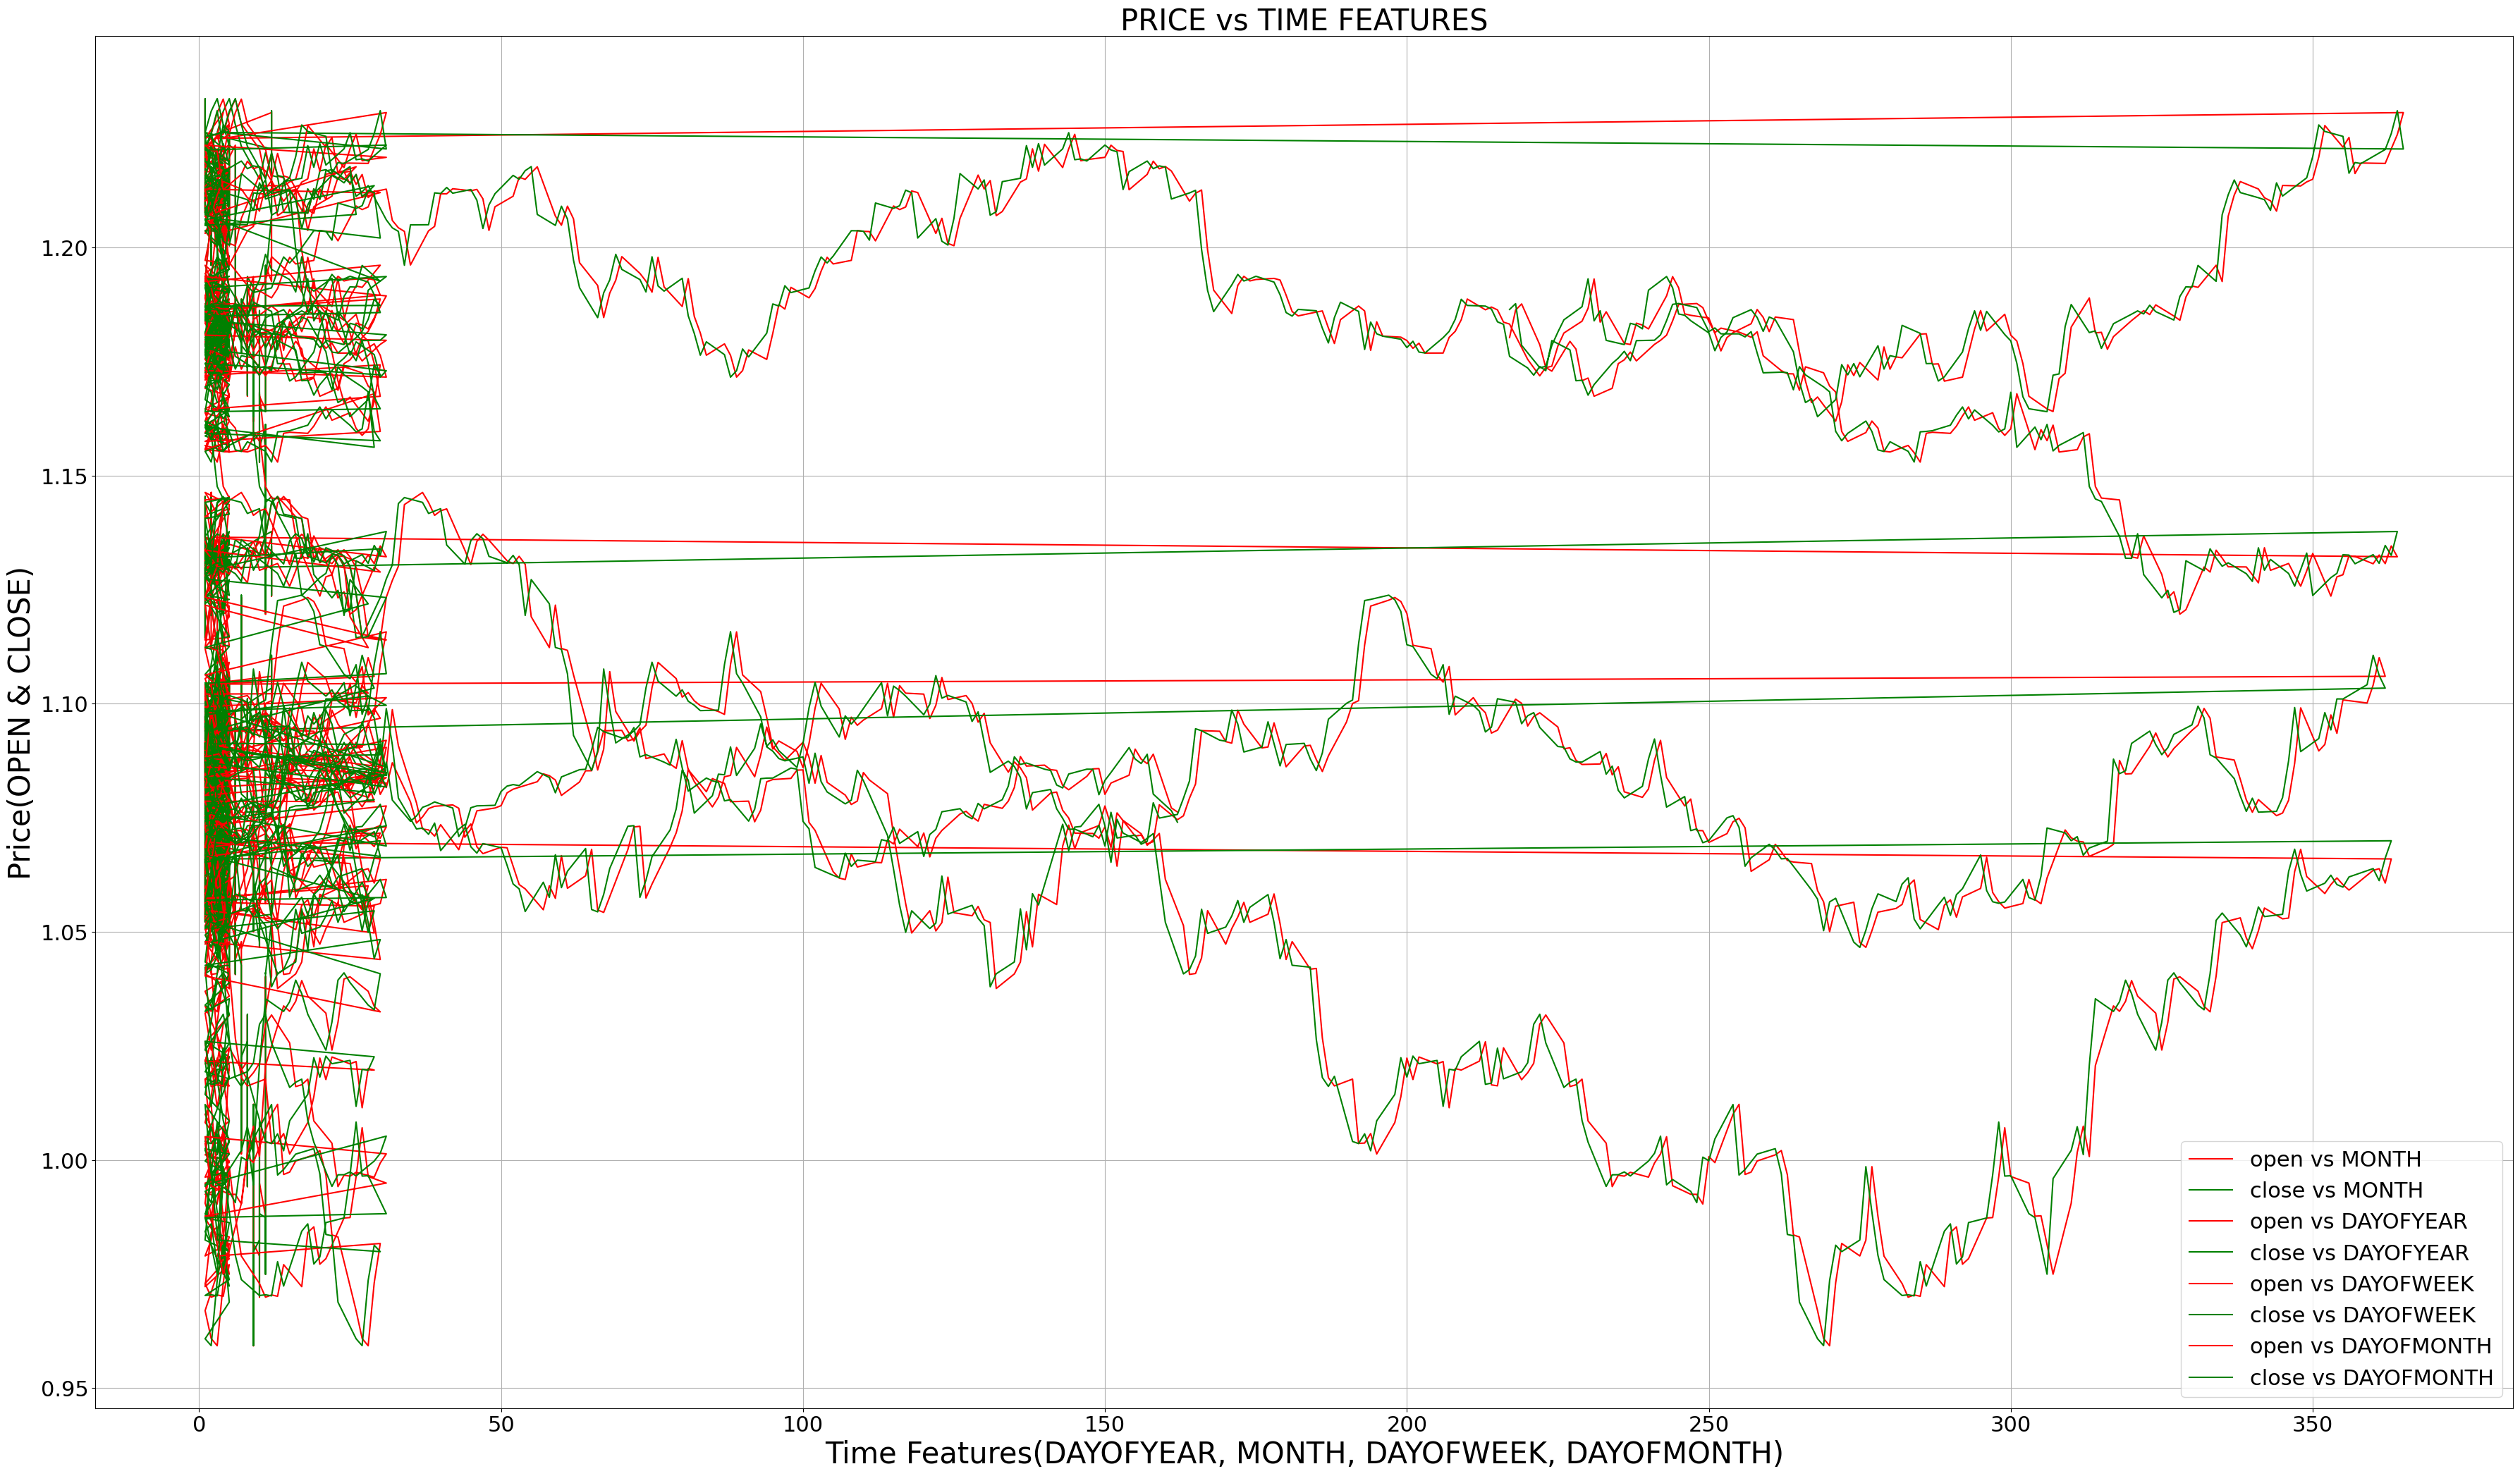

In [317]:
#Timeseries plot
Time_features = ['MONTH', 'DAYOFYEAR','DAYOFWEEK', 'DAYOFMONTH']
plt.figure(figsize=(35, 20))

for feature in Time_features:
    plt.plot(ohlc[feature], ohlc['OPEN'], label='open vs '+ str(feature), color='red')
    plt.plot(ohlc[feature], ohlc['CLOSE'], label='close vs '+ str(feature), color='green')

plt.grid(True)
plt.tight_layout()
plt.title('PRICE vs TIME FEATURES', fontsize=30)
plt.xlabel('Time Features(DAYOFYEAR, MONTH, DAYOFWEEK, DAYOFMONTH)', fontsize=30)
plt.ylabel('Price(OPEN & CLOSE)', fontsize=30)
plt.legend(fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

In [318]:
#creating a new year column

#row counts
rows_2000 = 106
rows_2001 = 260
rows_2002 = 259
rows_2003 = 259
rows_2004 = 116

#creating year for each row
year_2000 = np.full(rows_2000, 2000)
year_2001 = np.full(rows_2001, 2001)
year_2002 = np.full(rows_2002, 2002)
year_2003 = np.full(rows_2003, 2003)
year_2004 = np.full(rows_2004, 2004)

#Concatenating
ohlc['YEAR'] = np.concatenate([
    year_2000,
    year_2001,
    year_2002,
    year_2003,
    year_2004
])

print('year column created')
ohlc.tail()
ohlc.iloc[106]

year column created


,106
OPEN,1.223910
HIGH,1.230950
LOW,1.222750
CLOSE,1.225200
OPEN_LAG1,1.229560
HIGH_LAG1,1.230940
LOW_LAG1,1.220920
CLOSE_LAG1,1.221580
OPEN_LAG2,1.224730
HIGH_LAG2,1.231010


In [319]:
ohlc.sample(8)

,OPEN,HIGH,LOW,CLOSE,OPEN_LAG1,HIGH_LAG1,LOW_LAG1,CLOSE_LAG1,OPEN_LAG2,HIGH_LAG2,...,DAYOFWEEK,DAYOFYEAR,MONTH,DIFF_LAG1_OPEN,DIFF_LAG1_HIGH,DIFF_LAG1_LOW,DIFF_LAG1_CLOSE,TARGET_CLOSE,TARGET_OPEN,YEAR
319,1.16026,1.16922,1.15823,1.16826,1.15882,1.16260,1.15850,1.16023,1.16034,1.16258,...,4.0,300.0,10.0,0.00144,0.00662,-0.00027,0.00803,1.15621,1.16794,2001
317,1.16034,1.16258,1.15850,1.15957,1.16378,1.16652,1.15907,1.16102,1.16213,1.16557,...,2.0,298.0,10.0,-0.00344,-0.00394,-0.00057,-0.00145,1.16023,1.15882,2001
283,1.18377,1.18511,1.18021,1.18156,1.18682,1.18852,1.18375,1.18419,1.18771,1.18864,...,3.0,250.0,9.0,-0.00305,-0.00341,-0.00354,-0.00263,1.18236,1.18135,2001
876,1.09107,1.09875,1.09104,1.09806,1.08966,1.09312,1.08900,1.09238,1.09910,1.10038,...,2.0,352.0,12.0,0.00141,0.00563,0.00204,0.00568,1.09426,1.09755,2003
706,1.10447,1.10671,1.09641,1.09736,1.09892,1.10502,1.09659,1.10462,1.09642,1.09938,...,2.0,114.0,4.0,0.00555,0.00169,-0.00018,-0.00726,1.10386,1.09701,2003
34,1.17709,1.17736,1.16918,1.17045,1.18419,1.18717,1.17317,1.17715,1.18475,1.18705,...,2.0,265.0,9.0,-0.00710,-0.00981,-0.00399,-0.00670,1.16601,1.17073,2000
603,1.03248,1.04288,1.02903,1.04083,1.03368,1.03944,1.03201,1.03293,1.03698,1.04969,...,3.0,333.0,11.0,-0.00120,0.00344,-0.00298,0.00790,1.05253,1.04033,2002
620,1.05916,1.06329,1.05865,1.06204,1.06034,1.06595,1.05732,1.05981,1.06183,1.06456,...,5.0,356.0,12.0,-0.00118,-0.00266,0.00133,0.00223,1.06387,1.06349,2002


In [320]:
ohlc['YEAR'].value_counts().sort_index()

,count
YEAR,
2000,106
2001,260
2002,259
2003,259
2004,116


In [321]:
ohlc.iloc[100:110]

,OPEN,HIGH,LOW,CLOSE,OPEN_LAG1,HIGH_LAG1,LOW_LAG1,CLOSE_LAG1,OPEN_LAG2,HIGH_LAG2,...,DAYOFWEEK,DAYOFYEAR,MONTH,DIFF_LAG1_OPEN,DIFF_LAG1_HIGH,DIFF_LAG1_LOW,DIFF_LAG1_CLOSE,TARGET_CLOSE,TARGET_OPEN,YEAR
100,1.21620,1.22211,1.21539,1.21861,1.22411,1.22573,1.21523,1.21627,1.22199,1.22531,...,3.0,357.0,12.0,-0.00791,-0.00362,0.00016,0.00234,1.21840,1.21851,2000
101,1.21851,1.22156,1.21772,1.21840,1.21620,1.22211,1.21539,1.21861,1.22411,1.22573,...,4.0,358.0,12.0,0.00231,-0.00055,0.00233,-0.00021,1.22147,1.21842,2000
102,1.21842,1.22505,1.21810,1.22147,1.21851,1.22156,1.21772,1.21840,1.21620,1.22211,...,1.0,362.0,12.0,-0.00009,0.00349,0.00038,0.00307,1.22495,1.22162,2000
103,1.22162,1.22751,1.22068,1.22495,1.21842,1.22505,1.21810,1.22147,1.21851,1.22156,...,2.0,363.0,12.0,0.00320,0.00246,0.00258,0.00348,1.22998,1.22473,2000
104,1.22473,1.23101,1.22460,1.22998,1.22162,1.22751,1.22068,1.22495,1.21842,1.22505,...,3.0,364.0,12.0,0.00311,0.00350,0.00392,0.00503,1.22158,1.22956,2000
105,1.22956,1.23094,1.22092,1.22158,1.22473,1.23101,1.22460,1.22998,1.22162,1.22751,...,4.0,365.0,12.0,0.00483,-0.00007,-0.00368,-0.00840,1.22520,1.22391,2000
106,1.22391,1.23095,1.22275,1.22520,1.22956,1.23094,1.22092,1.22158,1.22473,1.23101,...,1.0,3.0,1.0,-0.00565,0.00001,0.00183,0.00362,1.22984,1.22483,2001
107,1.22483,1.23057,1.22432,1.22984,1.22391,1.23095,1.22275,1.22520,1.22956,1.23094,...,2.0,4.0,1.0,0.00092,-0.00038,0.00157,0.00464,1.23262,1.22953,2001
108,1.22953,1.23495,1.22656,1.23262,1.22483,1.23057,1.22432,1.22984,1.22391,1.23095,...,3.0,5.0,1.0,0.00470,0.00438,0.00224,0.00278,1.22693,1.23251,2001
109,1.23251,1.23445,1.22451,1.22693,1.22953,1.23495,1.22656,1.23262,1.22483,1.23057,...,4.0,6.0,1.0,0.00298,-0.00050,-0.00205,-0.00569,1.22218,1.22707,2001


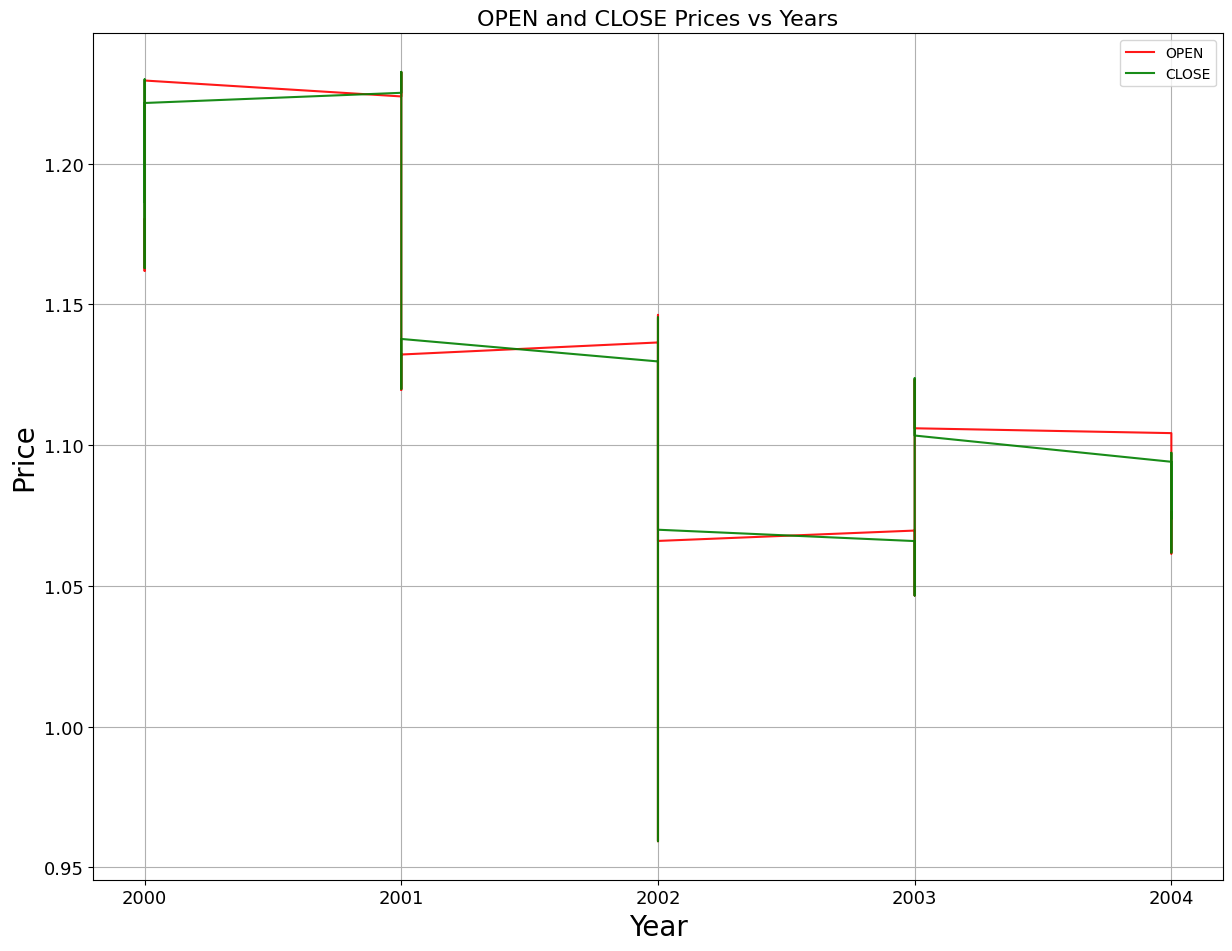

In [322]:
#timeseries plot  (PRICE vs YEAR)
plt.figure(figsize=[12,9])

plt.plot(ohlc['YEAR'], ohlc['OPEN'], label='OPEN', color='red', alpha=0.9)
plt.plot(ohlc['YEAR'], ohlc['CLOSE'], label='CLOSE', color='green', alpha=0.9)


plt.grid(True)
plt.tight_layout()
plt.title('OPEN and CLOSE Prices vs Years', fontsize=16)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(ohlc['YEAR'].unique(), fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()


In [323]:
#creating a new date column

ohlc['MONTH'] = ohlc['MONTH'].astype(int)
ohlc['DAYOFMONTH'] = ohlc['DAYOFMONTH'].astype(int)
ohlc['YEAR'] = ohlc['YEAR'].astype(int)

date_components = ohlc[['YEAR', 'MONTH', 'DAYOFMONTH']].copy()
date_components = date_components.rename(columns={'YEAR': 'year', 'MONTH': 'month', 'DAYOFMONTH': 'day'})

ohlc['DATE'] = pd.to_datetime(date_components)

print('date column created')
ohlc.head(20)


date column created


,OPEN,HIGH,LOW,CLOSE,OPEN_LAG1,HIGH_LAG1,LOW_LAG1,CLOSE_LAG1,OPEN_LAG2,HIGH_LAG2,...,DAYOFYEAR,MONTH,DIFF_LAG1_OPEN,DIFF_LAG1_HIGH,DIFF_LAG1_LOW,DIFF_LAG1_CLOSE,TARGET_CLOSE,TARGET_OPEN,YEAR,DATE
0,1.18025,1.19050,1.17920,1.18641,1.17617,1.18063,1.17213,1.18027,1.17708,1.17967,...,217.0,8,0.00408,0.00987,0.00707,0.00614,1.18768,1.18627,2000,2000-08-05
1,1.18627,1.19162,1.18179,1.18768,1.18025,1.19050,1.17920,1.18641,1.17617,1.18063,...,218.0,8,0.00602,0.00112,0.00259,0.00127,1.17855,1.18762,2000,2000-08-06
2,1.18762,1.18831,1.17553,1.17855,1.18627,1.19162,1.18179,1.18768,1.18025,1.19050,...,219.0,8,0.00135,-0.00331,-0.00626,-0.00913,1.17365,1.17869,2000,2000-08-07
3,1.17869,1.18007,1.17360,1.17365,1.18762,1.18831,1.17553,1.17855,1.18627,1.19162,...,222.0,8,-0.00893,-0.00824,-0.00193,-0.00490,1.17394,1.17365,2000,2000-08-10
4,1.17365,1.18080,1.17220,1.17394,1.17869,1.18007,1.17360,1.17365,1.18762,1.18831,...,223.0,8,-0.00504,0.00073,-0.00140,0.00029,1.17853,1.17398,2000,2000-08-11
5,1.17398,1.18171,1.17111,1.17853,1.17365,1.18080,1.17220,1.17394,1.17869,1.18007,...,224.0,8,0.00033,0.00091,-0.00109,0.00459,1.18145,1.17839,2000,2000-08-12
6,1.17839,1.18642,1.17776,1.18145,1.17398,1.18171,1.17111,1.17853,1.17365,1.18080,...,225.0,8,0.00441,0.00471,0.00665,0.00292,1.18414,1.18125,2000,2000-08-13
7,1.18125,1.18504,1.17817,1.18414,1.17839,1.18642,1.17776,1.18145,1.17398,1.18171,...,226.0,8,0.00286,-0.00138,0.00041,0.00269,1.18701,1.18384,2000,2000-08-14
8,1.18384,1.18810,1.18281,1.18701,1.18125,1.18504,1.17817,1.18414,1.17839,1.18642,...,229.0,8,0.00259,0.00306,0.00464,0.00287,1.19313,1.18666,2000,2000-08-17
9,1.18666,1.19657,1.18611,1.19313,1.18384,1.18810,1.18281,1.18701,1.18125,1.18504,...,230.0,8,0.00282,0.00847,0.00330,0.00612,1.18392,1.19310,2000,2000-08-18


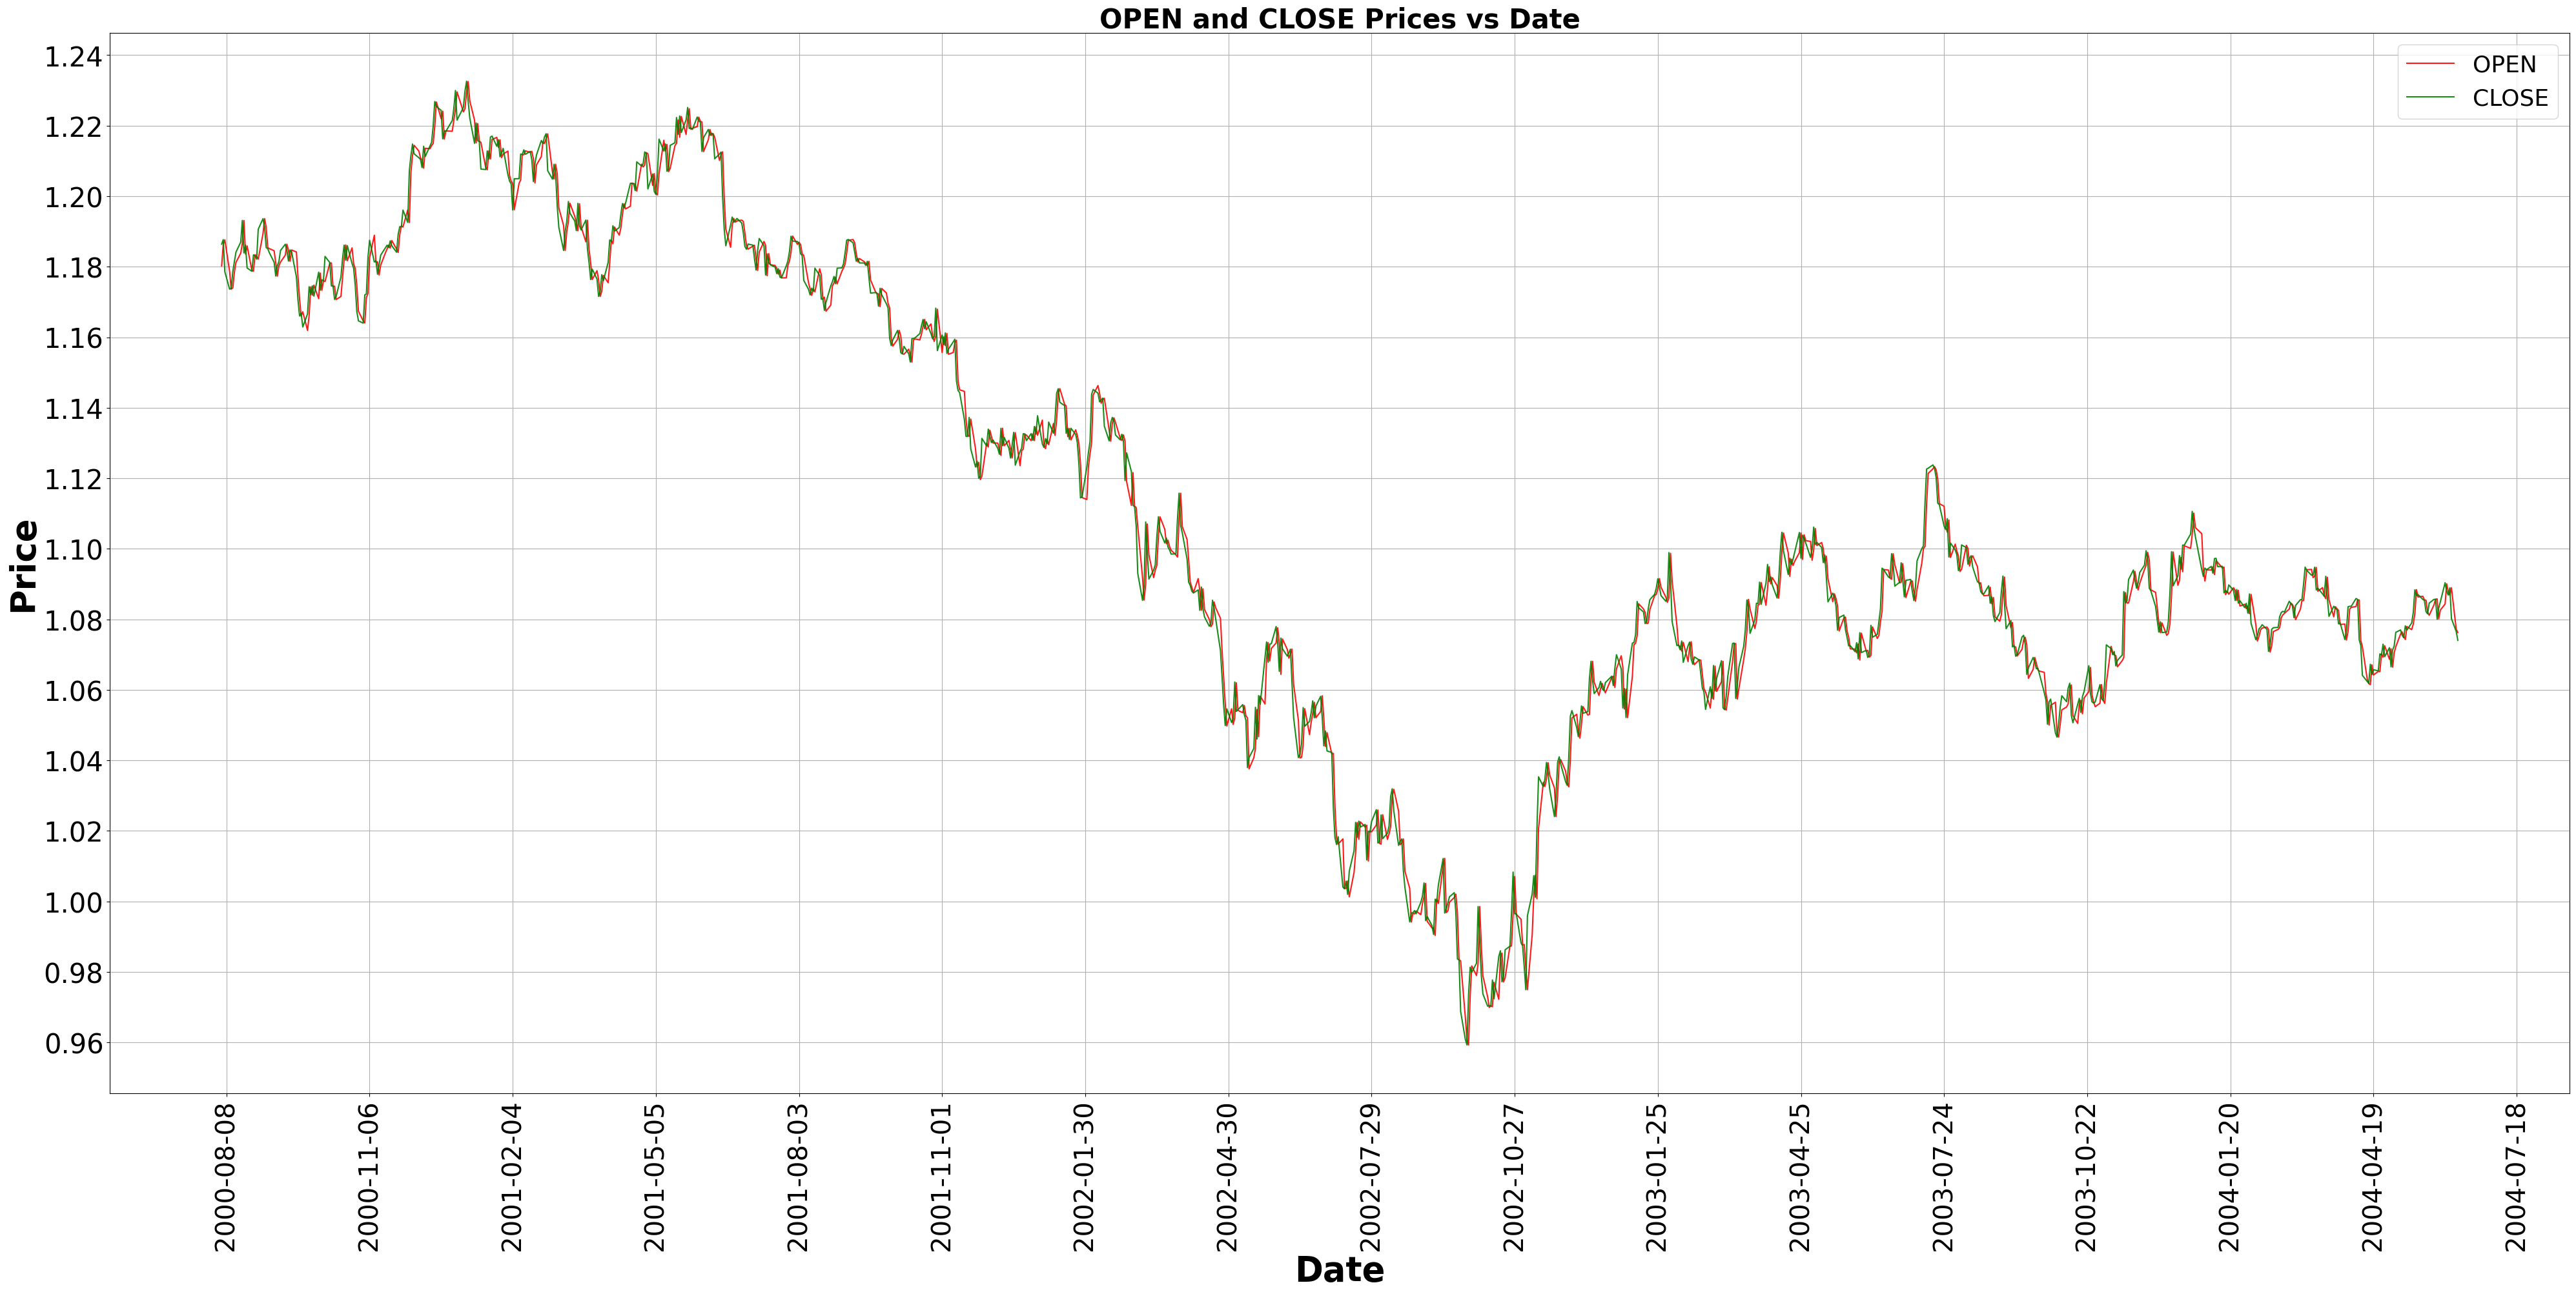

In [324]:
#final Timeseries plot (price vs Date)

plt.figure(figsize=(40,19.5))

plt.plot(ohlc['DATE'], ohlc['OPEN'],label='OPEN', color='red', alpha=0.9)
plt.plot(ohlc['DATE'], ohlc['CLOSE'],label='CLOSE', color='green', alpha=0.9)


plt.title('OPEN and CLOSE Prices vs Date', fontsize=30, fontweight='bold')
plt.xlabel('Date', fontsize=38, fontweight='bold')
plt.ylabel('Price', fontsize=38, fontweight='bold')
plt.xticks(fontsize=29, rotation=90)
plt.yticks(fontsize=30)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=26)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=20))

plt.show()

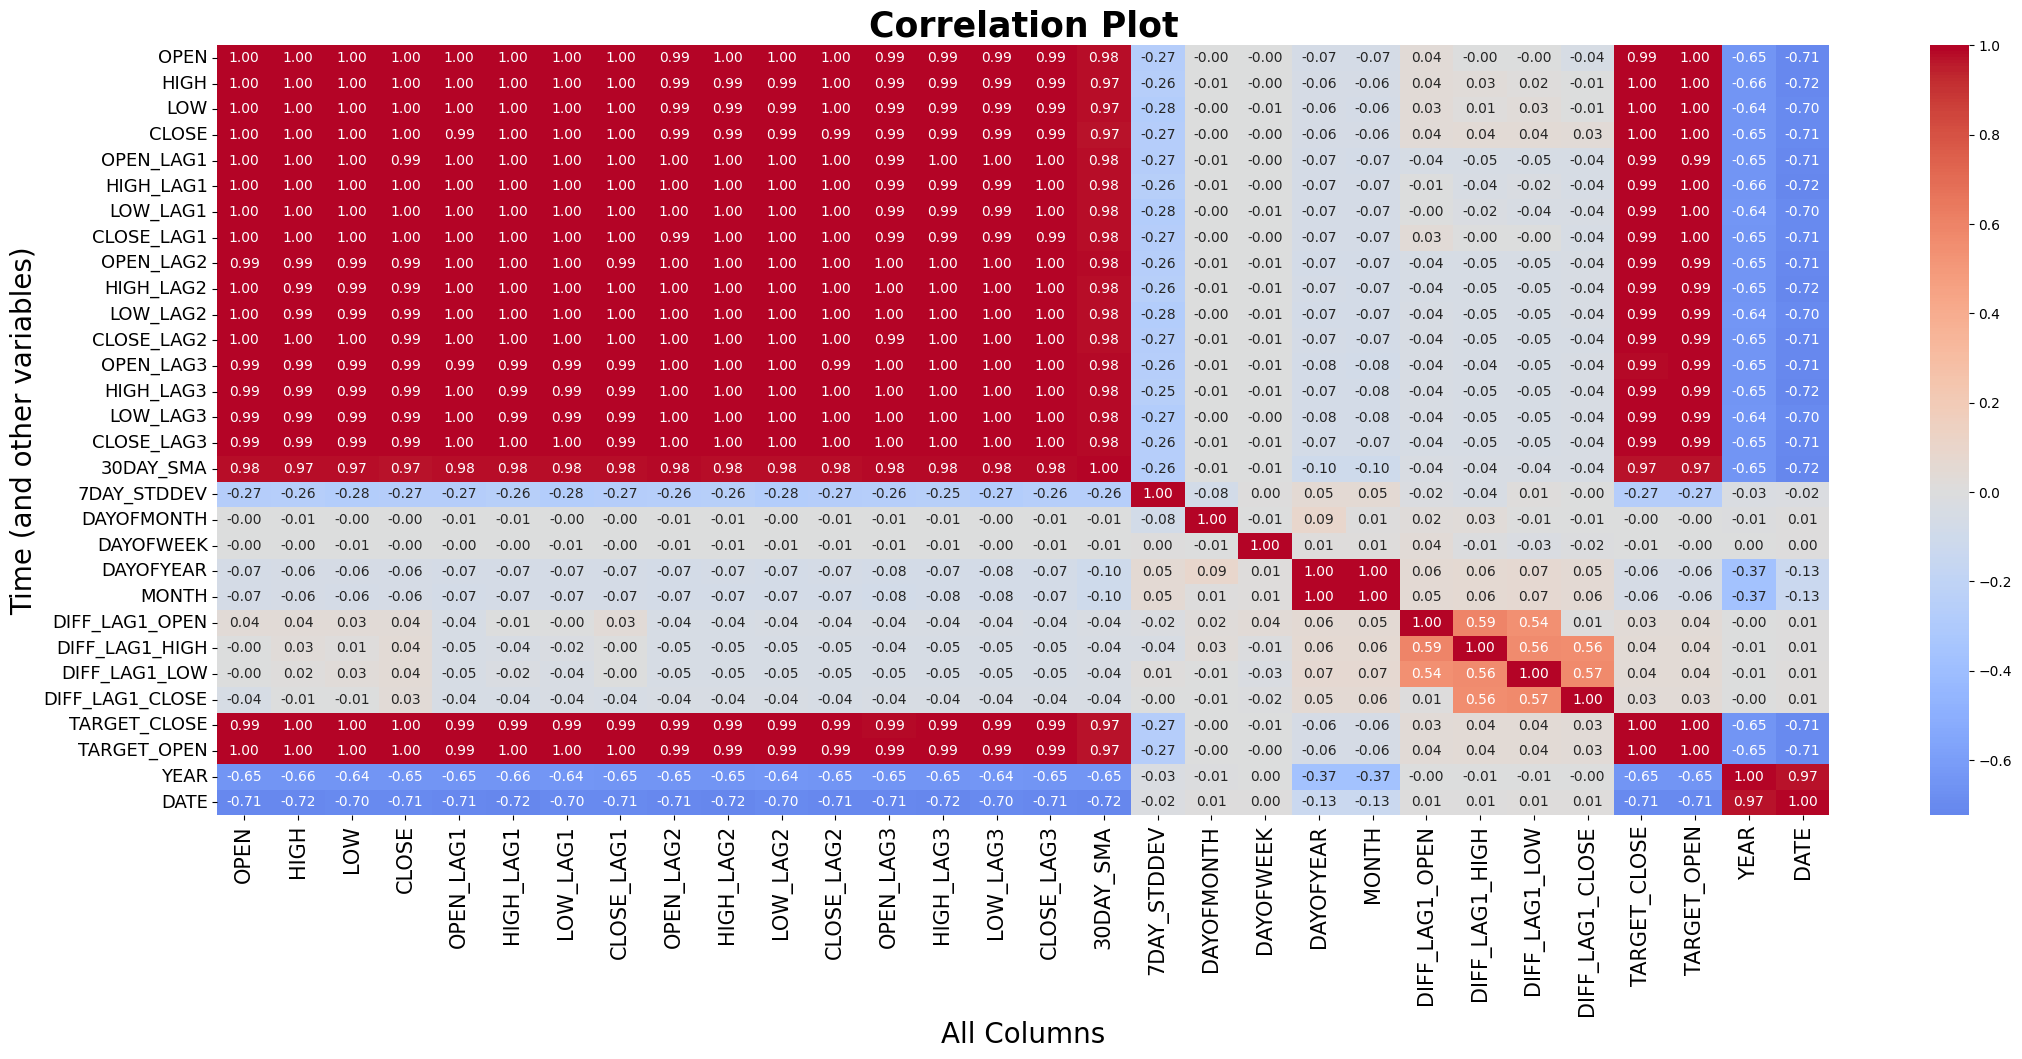

In [325]:
#Correlation plot
corr = ohlc.corr()
plt.figure(figsize=(26, 10))
sns.heatmap(corr, cmap='coolwarm' , center=0, annot=True, fmt=".2f")
plt.title('Correlation Plot', fontsize=25, fontweight='bold')
plt.xlabel('All Columns', fontsize=20)
plt.ylabel('Time (and other variables)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

In [326]:
#Creating a new Target column(target variable= Next price direction): 1 if price goes up, 0 if price goes down
ohlc['TARGET'] = (ohlc['TARGET_CLOSE'] > ohlc['CLOSE']).astype(int)
ohlc['TARGET'].head()


,TARGET
0,1
1,0
2,0
3,1
4,1


In [327]:
ohlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OPEN             1000 non-null   float64       
 1   HIGH             1000 non-null   float64       
 2   LOW              1000 non-null   float64       
 3   CLOSE            1000 non-null   float64       
 4   OPEN_LAG1        1000 non-null   float64       
 5   HIGH_LAG1        1000 non-null   float64       
 6   LOW_LAG1         1000 non-null   float64       
 7   CLOSE_LAG1       1000 non-null   float64       
 8   OPEN_LAG2        1000 non-null   float64       
 9   HIGH_LAG2        1000 non-null   float64       
 10  LOW_LAG2         1000 non-null   float64       
 11  CLOSE_LAG2       1000 non-null   float64       
 12  OPEN_LAG3        1000 non-null   float64       
 13  HIGH_LAG3        1000 non-null   float64       
 14  LOW_LAG3         1000 non-null   float64 

In [328]:
#Preparing data for modeling
X = ohlc.drop(['TARGET', 'TARGET_CLOSE', 'TARGET_OPEN','DATE'],axis=1)
Y = ohlc['TARGET']

In [329]:
#Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=40)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (600, 27) (600,)
Testing set shape: (400, 27) (400,)


**1.Logistic Regression Model**

In [330]:
#Initializing
lr_model = LogisticRegression(random_state=40,max_iter=1000)

# Training the model
lr_model.fit(X_train, Y_train)

#predicting the model
Y_pred = lr_model.predict(X_test)
print("working")

working


In [331]:
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.4950


In [332]:
correct_predictions = (Y_pred == Y_test).sum()
incorrect_predictions = (Y_pred != Y_test).sum()
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")

Correct Predictions: 198
Incorrect Predictions: 202


In [333]:
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       0.51      0.45      0.48       205
           1       0.48      0.54      0.51       195

    accuracy                           0.49       400
   macro avg       0.50      0.50      0.49       400
weighted avg       0.50      0.49      0.49       400



In [334]:
#cross-validation
cv_scores = cross_val_score(lr_model, X, Y, cv=5)

print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.5   0.485 0.39  0.525 0.485]
Mean cross-validation accuracy: 0.4770


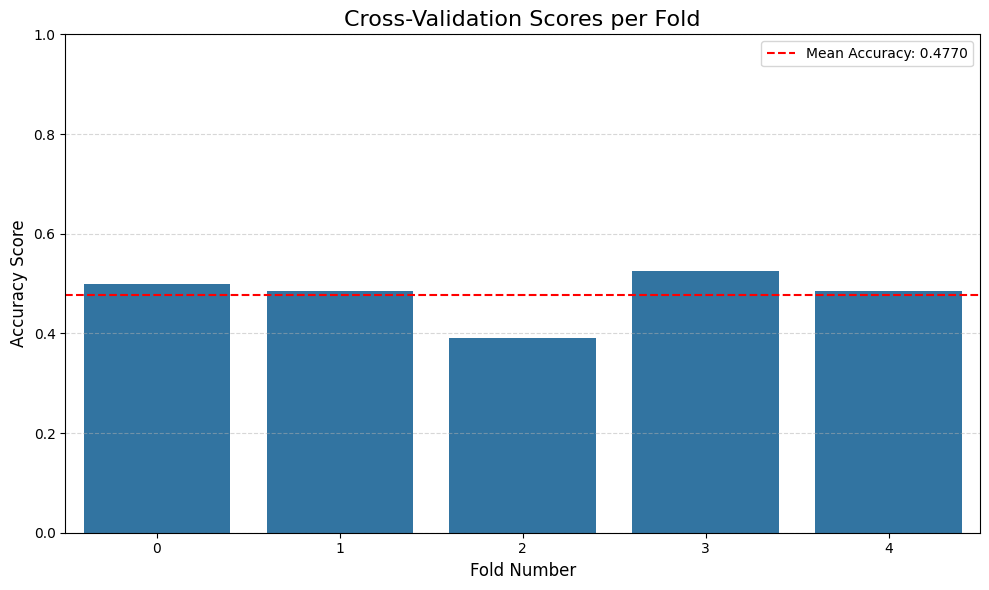

In [335]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(len(cv_scores))), y=cv_scores)
plt.axhline(cv_scores.mean(), color='red', linestyle='dashed', label=f'Mean Accuracy: {cv_scores.mean():.4f}')
plt.title('Cross-Validation Scores per Fold', fontsize=16)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1) # Accuracy scores are between 0 and 1
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='dashed', alpha=0.5)
plt.tight_layout()
plt.show()

In [336]:
#defining the parameters
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

lr = LogisticRegression(random_state=40, max_iter=1000)

grid_search = GridSearchCV(estimator=lr,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, Y_train)
print('fitted')


Fitting 5 folds for each of 144 candidates, totalling 720 fits
fitted


In [337]:
print("best parameters: " + str(grid_search.best_params_))

best parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [440]:
#hyperparameter tuning

Tuned_lr_model = LogisticRegression(C=1, max_iter=1000, penalty='l2', solver='lbfgs')

Tuned_lr_model.fit(X_train, Y_train)

Y_pred_tuned =Tuned_lr_model.predict(X_test)

Tuned_accuracy = accuracy_score(Y_test, Y_pred_tuned)
Tuned_Classification_Report = classification_report(Y_test, Y_pred_tuned)


print("Accuracy Score: " + str(Tuned_accuracy))
print("\nClassification Report:\n " + str(Tuned_Classification_Report))

Accuracy Score: 0.495

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.45      0.48       205
           1       0.48      0.54      0.51       195

    accuracy                           0.49       400
   macro avg       0.50      0.50      0.49       400
weighted avg       0.50      0.49      0.49       400



In [442]:
Y_pred_proba_tuned = Tuned_lr_model.predict_proba(X_test)[:, 1]

#roc-auc score
roc_auc_tuned = roc_auc_score(Y_test, Y_pred_proba_tuned)

print(f"Tuned Model ROC AUC Score: {roc_auc_tuned:.4f}")

Tuned Model ROC AUC Score: 0.4864


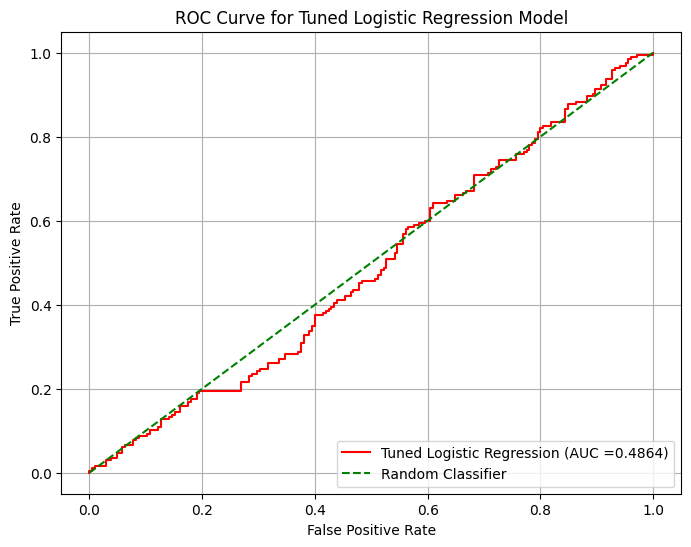

In [443]:
#ROC curve values
fpr, tpr,_= roc_curve(Y_test, Y_pred_proba_tuned)

#ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Tuned Logistic Regression (AUC ={roc_auc_tuned:.4f})', color='red')
plt.plot([0, 1], [0, 1], '--', label='Random Classifier', color='green')
plt.title('ROC Curve for Tuned Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

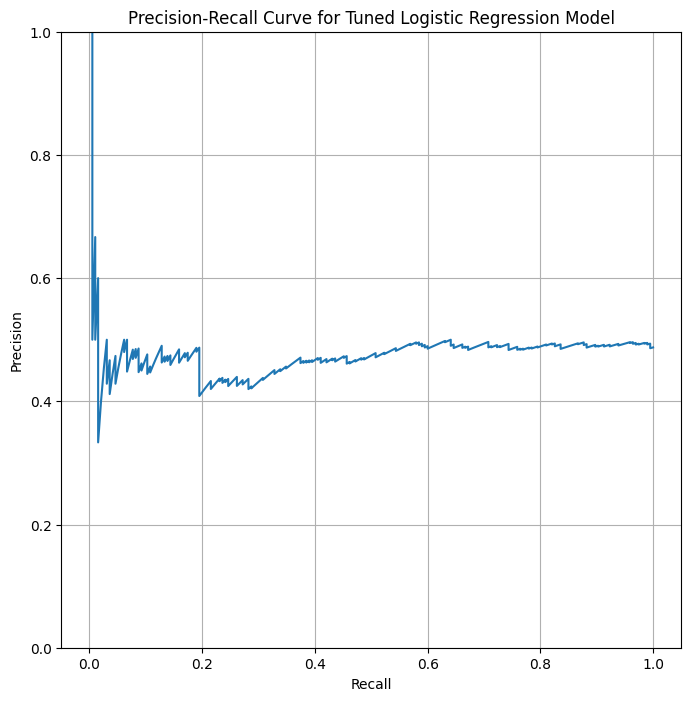

In [356]:
#precision-recall curve
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba_tuned)

#average precision score
plt.figure(figsize=(8, 8))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned Logistic Regression Model')
plt.grid()
plt.ylim(0, 1)
plt.show()

[[ 93 112]
 [ 90 105]]


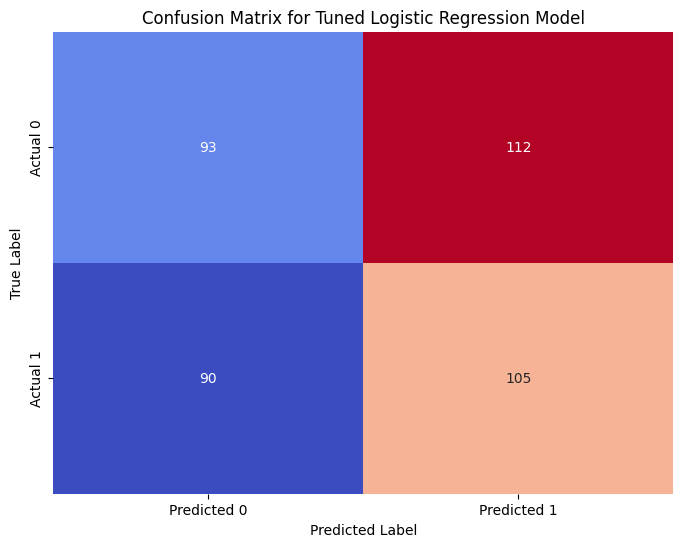

In [341]:
#confusion matrix
cm=confusion_matrix(Y_test, Y_pred_tuned)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Tuned Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**2.Random Forest Model**

In [371]:
#Initializing
rf_model = RandomForestClassifier(random_state=100)

# Training the model
rf_model.fit(X_train, Y_train)

#predicting the model
Y_pred_rf = rf_model.predict(X_test)
print("working")

working


In [372]:
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)

print(f"Accuracy Score: {rf_accuracy:.4f}")

Accuracy Score: 0.5150


In [373]:
correct_predictions = (Y_pred_rf == Y_test).sum()
incorrect_predictions = (Y_pred_rf != Y_test).sum()
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")

Correct Predictions: 206
Incorrect Predictions: 194


In [365]:
class_report = classification_report(Y_test, Y_pred_rf)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       0.49      0.51      0.50       205
           1       0.46      0.44      0.45       195

    accuracy                           0.47       400
   macro avg       0.47      0.47      0.47       400
weighted avg       0.47      0.47      0.47       400



In [370]:
#cross-validation
cv_scores = cross_val_score(rf_model, X, Y, cv=5)

print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.52  0.48  0.39  0.445 0.525]
Mean cross-validation accuracy: 0.4720


In [428]:
#defining the parameters
param_grid = {
  'random_state':[10, 20, 30, 40],
  'n_estimators': [100, 200, 300],
  'max_depth': [None, 10, 20]

}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, Y_train)
print('fitted')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
fitted


In [429]:
print("best parameters: " + str(grid_search.best_params_))

best parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 30}


In [432]:
#hyperparameter tuning
tuned_rf=RandomForestClassifier(max_depth= 10, n_estimators= 100,random_state=30)
tuned_rf.fit(X_train, Y_train)

Y_pred_tuned_rf = tuned_rf.predict(X_test)
tuned_rf_accuracy = accuracy_score(Y_test, Y_pred_tuned_rf)
tuned_classification_report = classification_report(Y_test, Y_pred_tuned_rf)

print(f"Accuracy Score: {tuned_rf_accuracy:.4f}")
print("\nClassification Report:\n " + str(tuned_classification_report))

Accuracy Score: 0.5150

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51       205
           1       0.50      0.54      0.52       195

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.51       400
weighted avg       0.52      0.52      0.51       400



In [433]:
Y_pred_proba_tuned_rf = tuned_rf.predict_proba(X_test)[:, 1]

#roc-auc score
roc_auc_tuned_rf = roc_auc_score(Y_test, Y_pred_proba_tuned_rf)

print(f"Tuned Model ROC AUC Score: {roc_auc_tuned_rf:.4f}")

Tuned Model ROC AUC Score: 0.4924


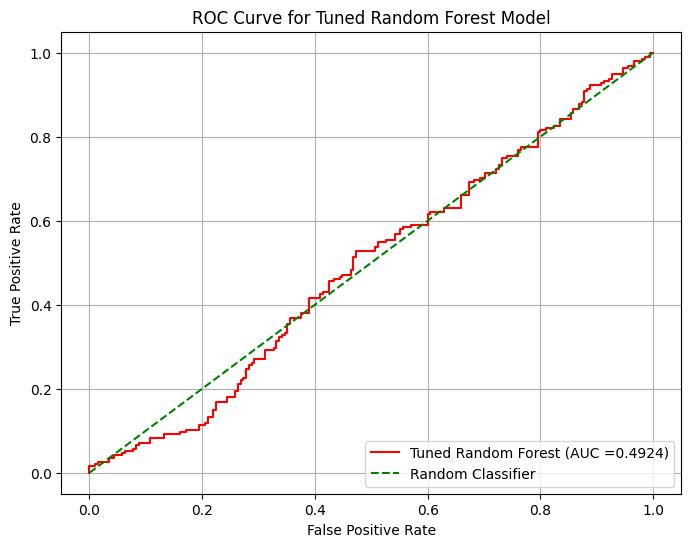

In [434]:
#ROC curve values
fpr, tpr,_= roc_curve(Y_test, Y_pred_proba_tuned_rf)

#ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Tuned Random Forest (AUC ={roc_auc_tuned_rf:.4f})', color='red')
plt.plot([0, 1], [0, 1], '--', label='Random Classifier', color='green')
plt.title('ROC Curve for Tuned Random Forest Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

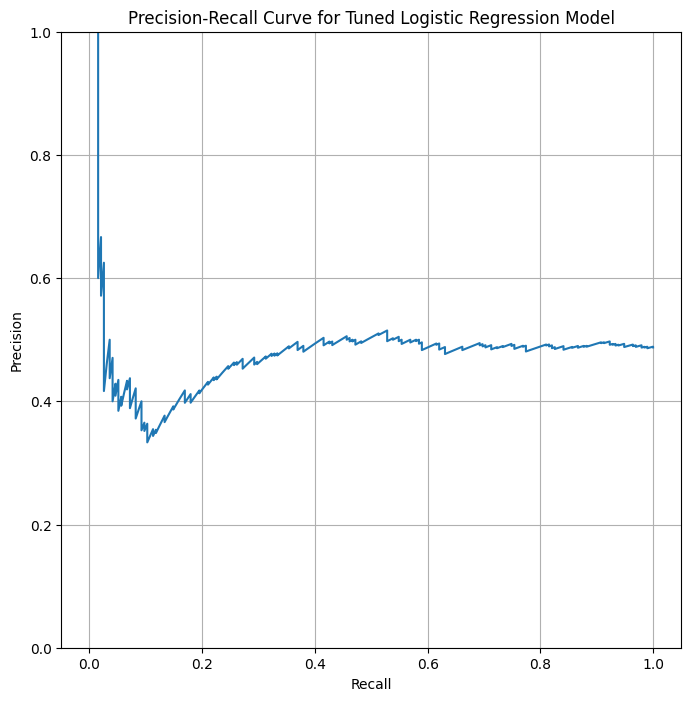

In [438]:
#precision-recall curve
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba_tuned_rf)

#average precision score
plt.figure(figsize=(8, 8))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned Logistic Regression Model')
plt.grid()
plt.ylim(0, 1)
plt.show()

[[100 105]
 [ 89 106]]


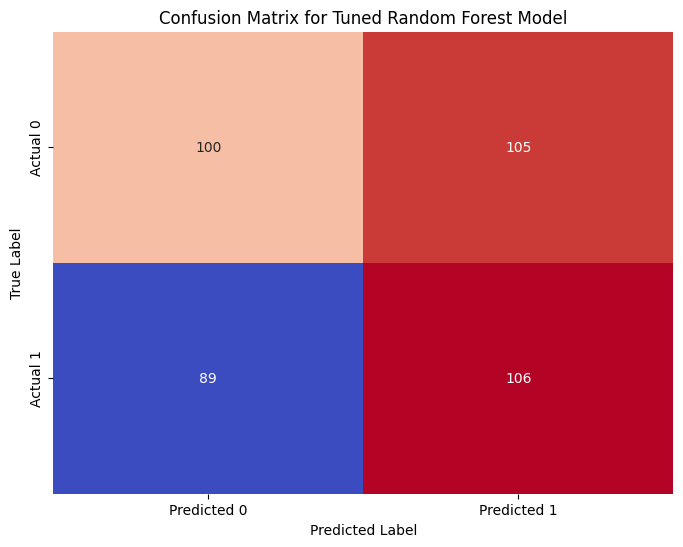

In [437]:
#confusion matrix
cm=confusion_matrix(Y_test, Y_pred_tuned_rf)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Tuned Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()